**The Head HR of a certain organization wants to automate their salary hike estimation. The organization consulted an analytics service provider and asked them to build a basic prediction model by providing them with a sample data that contains historic data of the years of experience and the salary hike given accordingly over the past years.**




Business objective: Salary hike given accordingly to their experience.

Business constraints: To predict the salary hike.

Data:We have two columns in our dataset, Years experience and salary.The data used for this analysis contains information on 30 records of Years experience and salary.

At first,we need to understand the data and hence we load the same and the libraries required.

In [ ]:
# Importing necessary libraries
import pandas as pd # deals with data frame                     # for Data Manipulation\n",
import numpy as np  # deals with numerical values              # for Mathematical calculations\n",

wcat = pd.read_csv("D:/7 data mining/supervised/linear regresstion/assignment/Salary_Data.csv")

wcat.describe()
###              YE             SL
count  30.000000      30.000000
mean    5.313333   76003.000000
std     2.837888   27414.429785
min     1.100000   37731.000000
25%     3.200000   56720.750000
50%     4.700000   65237.000000
75%     7.700000  100544.750000
max    10.500000  122391.000000

#Graphical Representation
import matplotlib.pyplot as plt # mostly used for visualization purposes          ####We use histogram, boxplot, scatter plot and regression line plot for better understanding the dataset.

plt.bar(height = wcat.SL, x = np.arange(1, 30, 1))
plt.hist(wcat.SL) #histogram
plt.boxplot(wcat.SL) #boxplot

plt.bar(height = wcat.YE, x = np.arange(1, 30, 1))
plt.hist(wcat.YE) #histogram
plt.boxplot(wcat.YE) #boxplot

# Scatter plot
plt.scatter(x = wcat['YE'], y = wcat['SL'], color = 'green') 

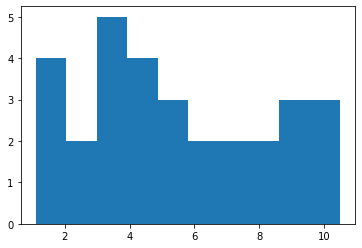

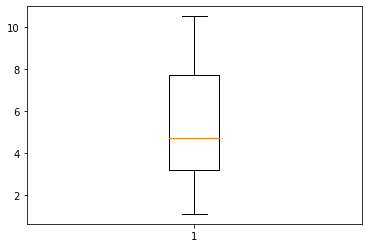

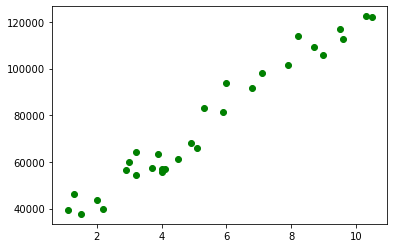

In [ ]:
# correlation

np.corrcoef(wcat.YE, wcat.SL) 
Out[34]: 
array([[1.        , 0.97824162],
       [0.97824162, 1.        ]])

# Covariance

# NumPy does not have a function to calculate the covariance between two variables directly. 

# Function for calculating a covariance matrix called cov() 

# By default, the cov() function will calculate the unbiased or sample covariance between the provided random variables.

cov_output = np.cov(wcat.YE, wcat.SL)[0, 1]

cov_output
Out[40]: 76106.30344827585

# wcat.cov()

# Import library

import statsmodels.formula.api as smf

# Simple Linear Regression

model = smf.ols('SL ~ YE', data = wcat).fit()

model.summary()
Out[46]: 
<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     SL   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Sat, 30 Oct 2021   Prob (F-statistic):           1.14e-20
Time:                        18:51:31   Log-Likelihood:                -301.44
No. Observations:                  30   AIC:                             606.9
Df Residuals:                      28   BIC:                             609.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2.579e+04   2273.053     11.347      0.000    2.11e+04    3.04e+04
YE          9449.9623    378.755     24.950      0.000    8674.119    1.02e+04
==============================================================================
Omnibus:                        2.140   Durbin-Watson:                   1.648
Prob(Omnibus):                  0.343   Jarque-Bera (JB):                1.569
Skew:                           0.363   Prob(JB):                        0.456
Kurtosis:                       2.147   Cond. No.                         13.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.


pred1 = model.predict(pd.DataFrame(wcat['YE']))

# Regression Line
plt.scatter(wcat.YE, wcat.SL)
plt.plot(wcat.YE, pred1, "r")
plt.legend(['Predicted line', 'Observed data'])
plt.YEow()

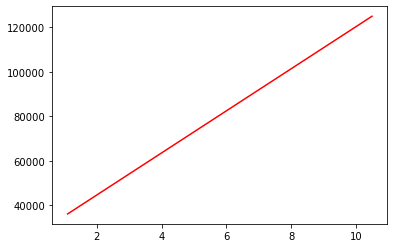

In [ ]:
# Error calculation

res1 = wcat.SL - pred1

res_sqr1 = res1 * res1

mse1 = np.mean(res_sqr1)

rmse1 = np.sqrt(mse1)

rmse1
Out[61]: 5592.043608760662

######### Model building on Transformed Data

# Log Transformation

# x = log(waist); y = at

plt.scatter(x = np.log(wcat['YE']), y = wcat['SL'], color = 'brown')
Out[65]: <matplotlib.collections.PathCollection at 0x1e06d70f460>

np.corrcoef(np.log(wcat.YE), wcat.SL) #correlation
Out[66]: 
array([[1.        , 0.92406108],
       [0.92406108, 1.        ]])

model2 = smf.ols('SL ~ np.log(YE)', data = wcat).fit()

model2.summary()
Out[68]: 
<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     SL   R-squared:                       0.854
Model:                            OLS   Adj. R-squared:                  0.849
Method:                 Least Squares   F-statistic:                     163.6
Date:                Sat, 30 Oct 2021   Prob (F-statistic):           3.25e-13
Time:                        18:54:32   Log-Likelihood:                -319.77
No. Observations:                  30   AIC:                             643.5
Df Residuals:                      28   BIC:                             646.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.493e+04   5156.226      2.895      0.007    4365.921    2.55e+04
np.log(YE)  4.058e+04   3172.453     12.792      0.000    3.41e+04    4.71e+04
==============================================================================
Omnibus:                        1.094   Durbin-Watson:                   0.512
Prob(Omnibus):                  0.579   Jarque-Bera (JB):                0.908
Skew:                           0.156   Prob(JB):                        0.635
Kurtosis:                       2.207   Cond. No.                         5.76
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

pred2 = model2.predict(pd.DataFrame(wcat['YE']))


In [ ]:
# Regression Line
plt.scatter(np.log(wcat.YE), wcat.SL)
plt.plot(np.log(wcat.YE), pred2, "r")
plt.legend(['Predicted line', 'Observed data'])
plt.YEow()

res2 = wcat.SL - pred2

res_sqr2 = res2 * res2

mse2 = np.mean(res_sqr2)

rmse2 = np.sqrt(mse2)

rmse2
Out[80]: 10302.893706228306

#### Exponential transformation

# x = waist; y = log(at)

plt.scatter(x = wcat['YE'], y = np.log(wcat['SL']), color = 'orange')
Out[83]: <matplotlib.collections.PathCollection at 0x1e06d873d90>

np.corrcoef(wcat.YE, np.log(wcat.SL)) #correlation
Out[84]: 
array([[1.        , 0.96538444],
       [0.96538444, 1.        ]])

model3 = smf.ols('np.log(SL) ~ YE', data = wcat).fit()

model3.summary()
Out[86]: 
<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             np.log(SL)   R-squared:                       0.932
Model:                            OLS   Adj. R-squared:                  0.930
Method:                 Least Squares   F-statistic:                     383.6
Date:                Sat, 30 Oct 2021   Prob (F-statistic):           7.03e-18
Time:                        18:56:10   Log-Likelihood:                 28.183
No. Observations:                  30   AIC:                            -52.37
Df Residuals:                      28   BIC:                            -49.56
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     10.5074      0.038    273.327      0.000      10.429      10.586
YE             0.1255      0.006     19.585      0.000       0.112       0.139
==============================================================================
Omnibus:                        0.826   Durbin-Watson:                   1.438
Prob(Omnibus):                  0.661   Jarque-Bera (JB):                0.812
Skew:                           0.187   Prob(JB):                        0.666
Kurtosis:                       2.286   Cond. No.                         13.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

pred3 = model3.predict(pd.DataFrame(wcat['YE']))

pred3_at = np.exp(pred3)

pred3_at
Out[89]: 
0      41998.957468
1      43066.066794
2      44160.289228
3      47019.029189
4      48213.688474
5      52639.142472
6      53303.675386
7      54658.014935
8      54658.014935
9      58196.330788
10     59674.982903
11     60428.338456
12     60428.338456
13     61191.204604
14     64340.199291
15     67651.246149
16     69370.128712
17     71132.684635
18     76693.630780
19     77661.835040
20     85860.704208
21     89153.725393
22     98565.809591
23    102346.110512
24    108971.540758
25    113150.933364
26    120475.819601
27    121996.743836
28    133194.621344
29    136578.829694
dtype: float64

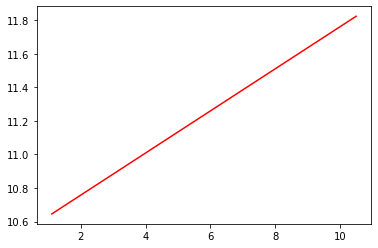

In [ ]:
# Regression Line
plt.scatter(wcat.YE, np.log(wcat.SL))
plt.plot(wcat.YE, pred3, "r")
plt.legend(['Predicted line', 'Observed data'])
plt.YEow()

# Error calculation

res3 = wcat.SL - pred3_at

res_sqr3 = res3 * res3

mse3 = np.mean(res_sqr3)

rmse3 = np.sqrt(mse3)

rmse3
Out[100]: 7213.235076620096

#### Polynomial transformation
# x = waist; x^2 = waist*waist; y = log(at)

model4 = smf.ols('np.log(SL) ~ YE + I(DT*DT)', data = wcat).fit()
model4.summary()

pred4 = model4.predict(pd.DataFrame(wcat))
pred4_at = np.exp(pred4)
pred4_at

# Regression line
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 2)
X = wcat.iloc[:, 0:1].values
X_poly = poly_reg.fit_transform(X)
# y = wcat.iloc[:, 1].values


plt.scatter(wcat.YE, np.log(wcat.SL))
plt.plot(X, pred4, color = 'red')
plt.legend(['Predicted line', 'Observed data'])
plt.YEow()


# Error calculation
res4 = wcat.SL - pred4_at
res_sqr4 = res4 * res4
mse4 = np.mean(res_sqr4)
rmse4 = np.sqrt(mse4)
rmse4


# Choose the best model using RMSE
data = {"MODEL":pd.Series(["SLR", "Log model", "Exp model", "Poly model"]), "RMSE":pd.Series([rmse1, rmse2, rmse3, rmse4])}
table_rmse = pd.DataFrame(data)
table_rmse

###################
# The best model

from sklearn.model_selection import train_test_split

train, test = train_test_split(wcat, test_size = 0.2)

finalmodel = smf.ols('np.log(SL) ~ YE + I(YE*YE)', data = train).fit()

finalmodel.summary()
Out[114]: 
<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             np.log(SL)   R-squared:                       0.955
Model:                            OLS   Adj. R-squared:                  0.951
Method:                 Least Squares   F-statistic:                     224.6
Date:                Sat, 30 Oct 2021   Prob (F-statistic):           6.68e-15
Time:                        18:59:23   Log-Likelihood:                 26.921
No. Observations:                  24   AIC:                            -47.84
Df Residuals:                      21   BIC:                            -44.31
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     10.3292      0.077    133.409      0.000      10.168      10.490
YE             0.2110      0.031      6.746      0.000       0.146       0.276
I(YE * YE)    -0.0075      0.003     -2.888      0.009      -0.013      -0.002
==============================================================================
Omnibus:                        0.098   Durbin-Watson:                   1.551
Prob(Omnibus):                  0.952   Jarque-Bera (JB):                0.282
Skew:                           0.114   Prob(JB):                        0.869
Kurtosis:                       2.521   Cond. No.                         260.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Predict on test data

test_pred = finalmodel.predict(pd.DataFrame(test))

pred_test_SL = np.exp(test_pred)

pred_test_SL
Out[118]: 
18    81917.079799
11    63156.358345
13    64113.141980
0     38263.055068
19    82921.996181
14    67985.632747
dtype: float64

# Model Evaluation on Test data

test_res = test.SL - pred_test_SL

test_sqrs = test_res * test_res

test_mse = np.mean(test_sqrs)

test_rmse = np.sqrt(test_mse)

test_rmse
Out[124]: 6755.067360615691

# Prediction on train data

train_pred = finalmodel.predict(pd.DataFrame(train))

pred_train_SL = np.exp(train_pred)

pred_train_SL
Out[128]: 
25    111509.230089
29    122941.719158
22    101609.249591
3      45307.578103
10     62204.544716
21     93892.079745
28    121588.437463
1      39768.909907
17     75899.354511
4      46964.011035
27    116418.170114
23    104405.918014
26    115628.503049
2      41309.296144
7      55697.770965
16     73904.817905
15     71919.636627
20     90926.948726
24    108912.708578
9      60316.653107
6      53894.340212
8      55697.770965
5      53002.744241
12     63156.358345
dtype: float64

# Model Evaluation on train data

train_res = train.SL- pred_train_SL

train_sqrs = train_res * train_res

train_mse = np.mean(train_sqrs)

train_rmse = np.sqrt(train_mse)

train_rmse
Out[134]: 4909.220900340248
